<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1> Geometric Operations and Other Mathematical Tools with Pillow</h1>


Estimated time needed: **40** minutes


<h2> Spatial Operations in Image Processing</h2>


Spatial operations use  pixels in a neighborhood to determine the present pixel value. Some applications include filtering and sharpening. They are used in many steps in computer vision, such as segmentation, and are a key building block in Artificial Intelligence algorithms.


- Linear Filtering
    - Filtering Noise
    - Gaussian Blur
    - Image Sharpening
- Edges
- Median


* * *


Download the images for the lab


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png   

We will import the following libraries


In [1]:
# Used to view the images
import matplotlib.pyplot as plt
# Used to load an image
from PIL import Image
# Used to create kernels for filtering
import numpy as np

This function will plot two images side by side 


In [2]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1)
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2)
    plt.title(title_2)
    plt.show()

Spatial operations use the neighboring pixels to determine the present pixel value 


## Linear  Filtering


Filtering involves enhancing an image, for example, removing the noise from an image. Noise can be caused by a bad camera or bad image compression. The same factors that cause noise may lead to blurry images. We can apply filters to sharpen these images. Convolution is a standard way to filter an image. The filter is called the kernel and different kernels perform different tasks. In addition, Convolution is used for many of the most advanced artificial intelligence algorithms. We simply take the dot product of the kernel and an equally-sized portion of the image. We then shift the kernel and repeat.


Consider the following image:


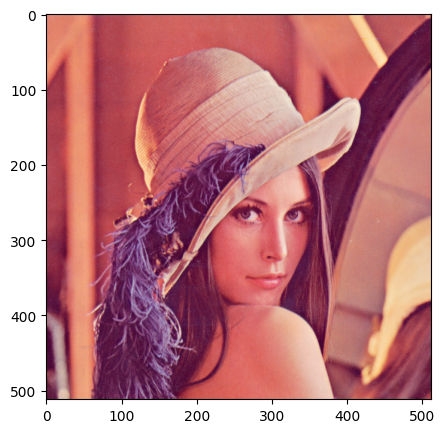

In [7]:
# Loads the image from the specified file
image = Image.open("lenna.png")
# Renders the image
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.show()

The images we are working with are comprised of RGB values, which are values from 0 to 255. Zero means white noise, this makes the image look grainy:


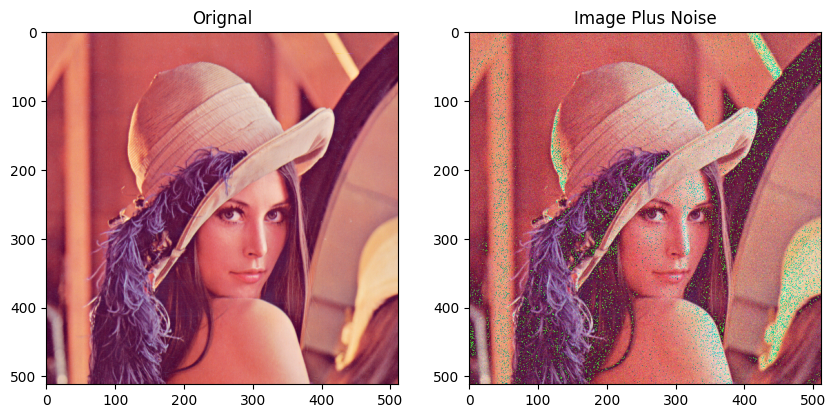

In [8]:
# Get the number of rows and columns in the image
rows, cols = image.size
# Creates values using a normal distribution with a mean of 0 and standard deviation of 15, the values are converted to unit8 which means the values are between 0 and 255
noise = np.random.normal(0,15,(rows,cols,3)).astype(np.uint8)
# Add the noise to the image
noisy_image = image + noise
# Creates a PIL Image from an array
noisy_image = Image.fromarray(noisy_image)
# Plots the original image and the image with noise using the function defined at the top
plot_image(image, noisy_image, title_1="Orignal", title_2="Image Plus Noise")

When adding noise to an image sometimes the value might be greater than 255, in this case 256, is subtracted from the value to wrap the number around keeping it between 0 and 255. For example, consider an image with an RGB value of 137 and we add noise with an RGB value of 215 to get an RGB value of 352. We then subtract 256, the total number of possible values between 0 and 255, to get a number between 0 and 255.


### Filtering Noise


To be able to create customer kernels and use predefined filters we must import the following library


In [9]:
from PIL import ImageFilter

Smoothing filters average out the Pixels within a neighborhood, they are sometimes called low pass filters. For mean filtering, the  kernel simply averages out the kernels in a neighborhood.


In [10]:
# Create a kernel which is a 5 by 5 array where each value is 1/36
kernel = np.ones((5,5))/36
# Create a ImageFilter Kernel by providing the kernel size and a flattened kernel
kernel_filter = ImageFilter.Kernel((5,5), kernel.flatten())

The function <code>filter</code> performs a convolution between the image and the kernel on each color channel independently.


In [11]:
# Filters the images using the kernel
image_filtered = noisy_image.filter(kernel_filter)

We can plot the image before and after the filtering. We see the noise is reduced, but the image is blurry:


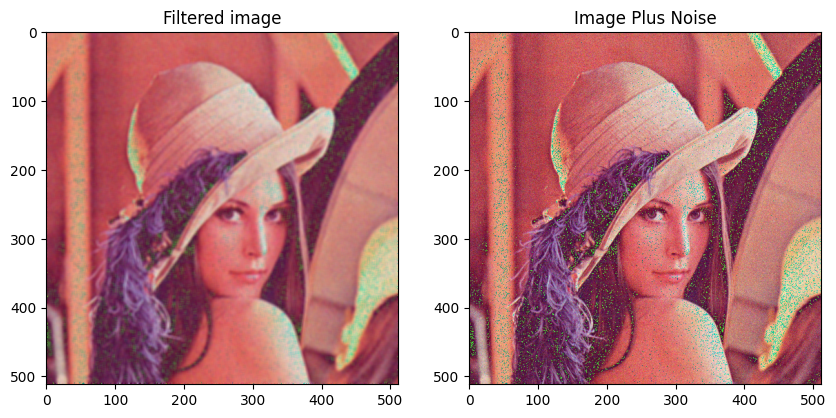

In [12]:
# Plots the Filtered and Image with Noise using the function defined at the top
plot_image(image_filtered, noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

A smaller kernel keeps the image sharp, but filters less noise, here we try a 3x3 kernel. You can see her shoulders are sharper in this image but the green noise is brighter than the filtered image above.


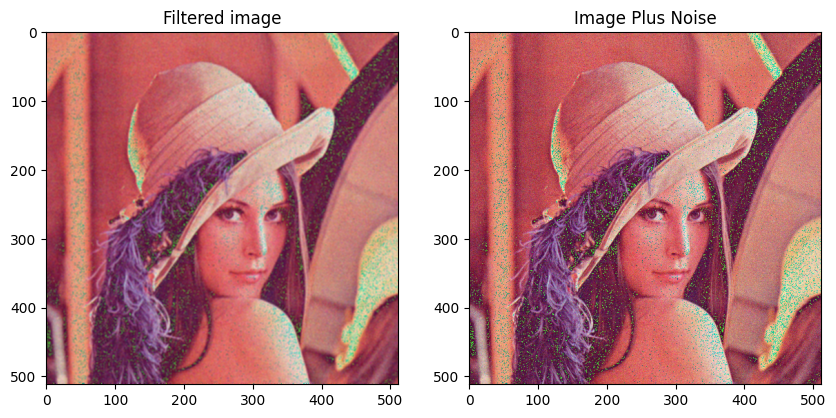

In [13]:
# Create a kernel which is a 3 by 3 array where each value is 1/36
kernel = np.ones((3,3))/36
# Create a ImageFilter Kernel by providing the kernel size and a flattened kernel
kernel_filter = ImageFilter.Kernel((3,3), kernel.flatten())
# Filters the images using the kernel
image_filtered = noisy_image.filter(kernel_filter)
# Plots the Filtered and Image with Noise using the function defined at the top
plot_image(image_filtered, noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

### Gaussian Blur


To perform Gaussian Blur we use the `filter` function on an image using the predefined filter `ImageFilter.GaussianBlur`


Parameters

<p><code>radius</code>: blur kernel radius, default 2</p>


In [ ]:
# Filters the images using GaussianBlur
image_filtered = noisy_image.filter(ImageFilter.GaussianBlur)
# Plots the Filtered Image then the Unfiltered Image with Noise
plot_image(image_filtered , noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

Lets try using a 4 by 4 kernel


In [ ]:
# Filters the images using GaussianBlur on the image with noise using a 4 by 4 kernel 
image_filtered = noisy_image.filter(ImageFilter.GaussianBlur(4))
# Plots the Filtered Image then the Unfiltered Image with Noise
plot_image(image_filtered , noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

### Image Sharpening


Image Sharpening involves smoothing the image and calculating the derivatives.  We can accomplish image sharpening by applying the following Kernel.


In [ ]:
# Common Kernel for image sharpening
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
kernel = ImageFilter.Kernel((3,3), kernel.flatten())
# Applys the sharpening filter using kernel on the original image without noise
sharpened = image.filter(kernel)
# Plots the sharpened image and the original image without noise
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

We can also sharpen using a predefined filter


In [ ]:
# Sharpends image using predefined image filter from PIL
sharpened = image.filter(ImageFilter.SHARPEN)
# Plots the sharpened image and the original image without noise
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

## Edges


Edges are where pixel intensities change. The Gradient of a function outputs the rate of change; we can approximate the gradient of a grayscale image with convolution. Consider the following image:


In [ ]:
# Loads the image from the specified file
img_gray = Image.open('barbara.png')
# Renders the image from the array of data, notice how it is 2 diemensional instead of 3 diemensional because it has no color
plt.imshow(img_gray ,cmap='gray')

We enhance the edges so they are better picked up when we use edge detection


In [ ]:
# Filters the images using EDGE_ENHANCE filter
img_gray = img_gray.filter(ImageFilter.EDGE_ENHANCE)
# Renders the enhanced image
plt.imshow(img_gray ,cmap='gray')

In [ ]:
# Filters the images using FIND_EDGES filter
img_gray = img_gray.filter(ImageFilter.FIND_EDGES)
# Renders the filtered image
plt.figure(figsize=(10,10))
plt.imshow(img_gray ,cmap='gray')

## Median

Median filters find the median of all the pixels under the kernel area and the central element is replaced with this median value. 


We can apply median filters to regular images but let’s see how we can use a median filter to improve segmentation. Consider the cameraman example: 


In [ ]:
# Load the camera man image
image = Image.open("cameraman.jpeg")
# Make the image larger when it renders
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(image,cmap="gray")

Median filtering blurs the background, increasing the segmentation between the cameraman and the background


In [ ]:
image = image.filter(ImageFilter.MedianFilter)
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(image,cmap="gray")

<h2>Authors</h2>


 [Joseph Santarcangelo](https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Nurture&utm_content=000026UJ&utm_term=10006555&utm_id=SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-CV0101EN-Coursera-25797139&utm_email=Email&utm_campaign=PLACEHOLDER) has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


# References


[1]  Images were taken from: [https://homepages.cae.wisc.edu/~ece533/images/](https://homepages.cae.wisc.edu/~ece533/images/?utm_medium=Exinfluencer&utm_source=Nurture&utm_content=000026UJ&utm_term=10006555&utm_id=SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-CV0101EN-Coursera-25797139&utm_email=Email&utm_campaign=PLACEHOLDER)

[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2022-01-01'>Pillow Docs</a>

[3]  <a href='https://opencv.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2022-01-01'>Open CV</a>

[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).

[5 ] Jian, Wushuai, Xueyan Sun, and Shuqian Luo. "Computer-aided diagnosis of breast microcalcifications based on dual-tree complex wavelet transform." Biomedical engineering online 11.1 (2012): 1-12.


<h2>Change Log</h2>


<table>
    <tr>
        <th>Date (YYYY-MM-DD)</th>
        <th>Version</th>
        <th>Changed By</th>
        <th>Change Description</th>
    </tr>
    <tr>
        <td>2020-07-20</td>
        <td>0.2</td>
        <td>Azim</td>
        <td>Modified Multiple Areas</td>
    </tr>
    <tr>
        <td>2020-07-17</td>
        <td>0.1</td>
        <td>Azim</td>
        <td>Created Lab Template</td>
    </tr>
</table>


Copyright © 2020 IBM Corporation. All rights reserved.
